# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")



df=pd.read_csv("/kaggle/input/tourism-dataset/tourism_dataset.csv")
print("Data information",df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.6+ KB
Data information None
Location                   0
Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
dtype: int64
            Visitors       Rating        Revenue
count    5989.000000  5989.000000    5989.000000
mean   5

# **EDA**

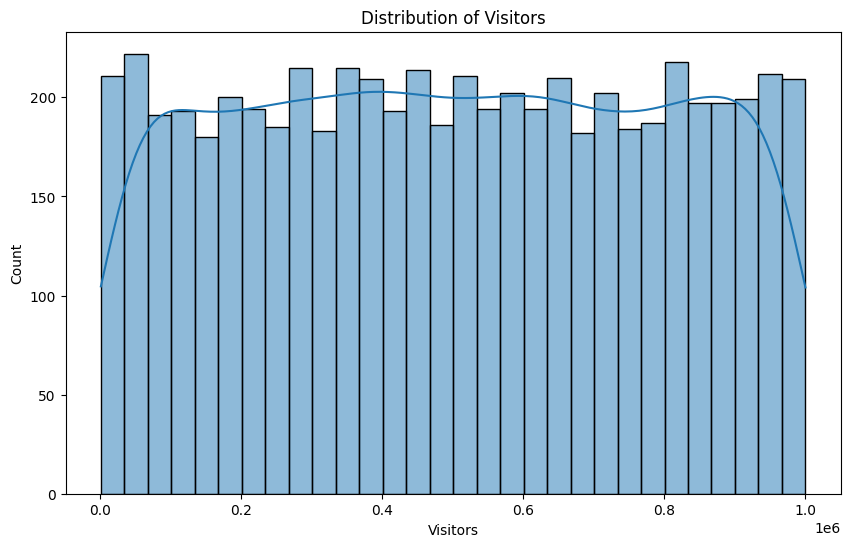

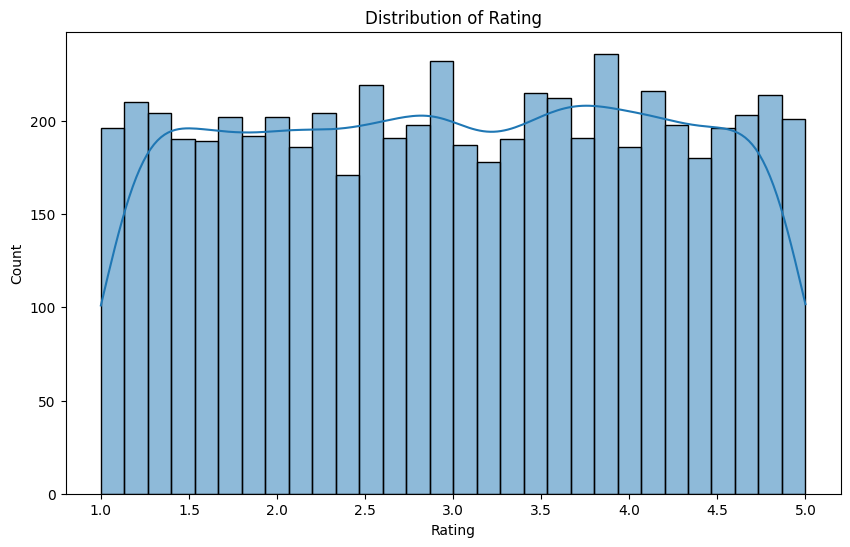

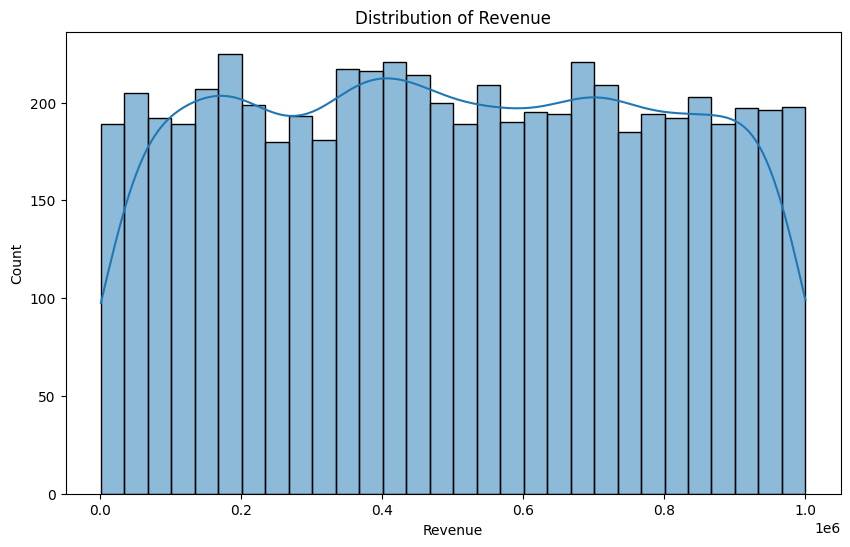

In [2]:
# Distribution plots for numerical columns
numerical_cols = ['Visitors', 'Rating', 'Revenue']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

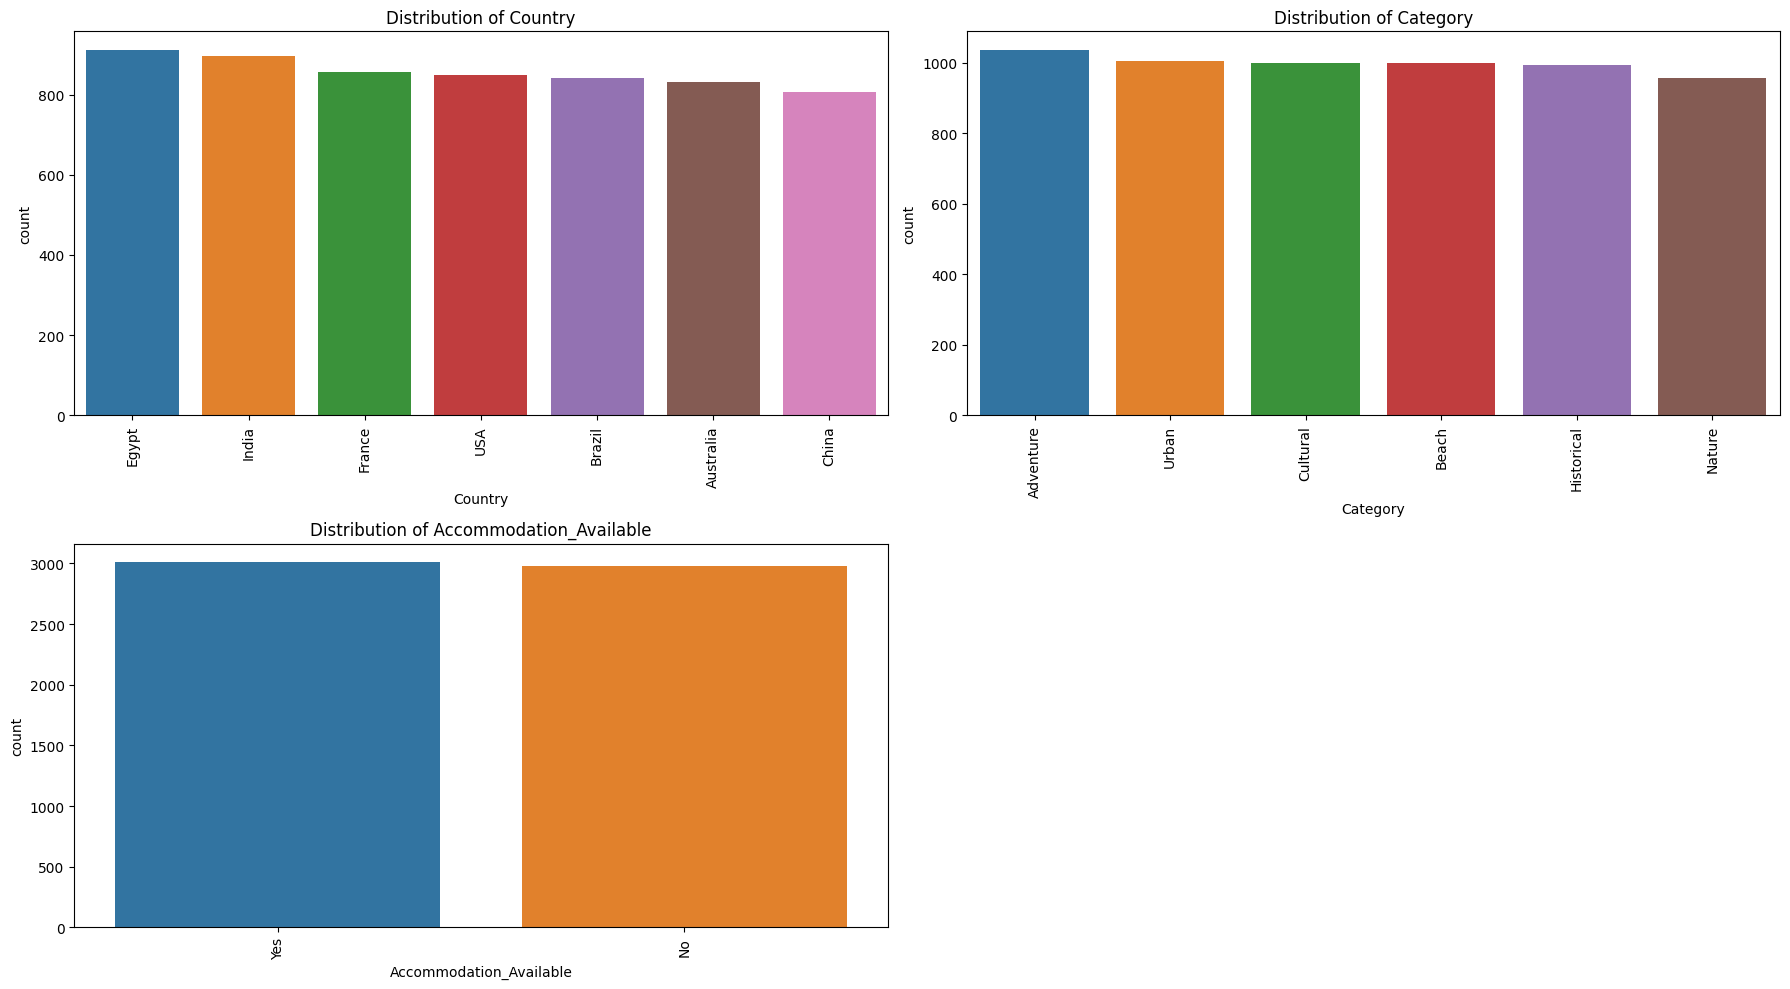

In [3]:
# Plot distribution of categorical features
categorical_features = ['Country', 'Category', 'Accommodation_Available']
plt.figure(figsize=(18, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


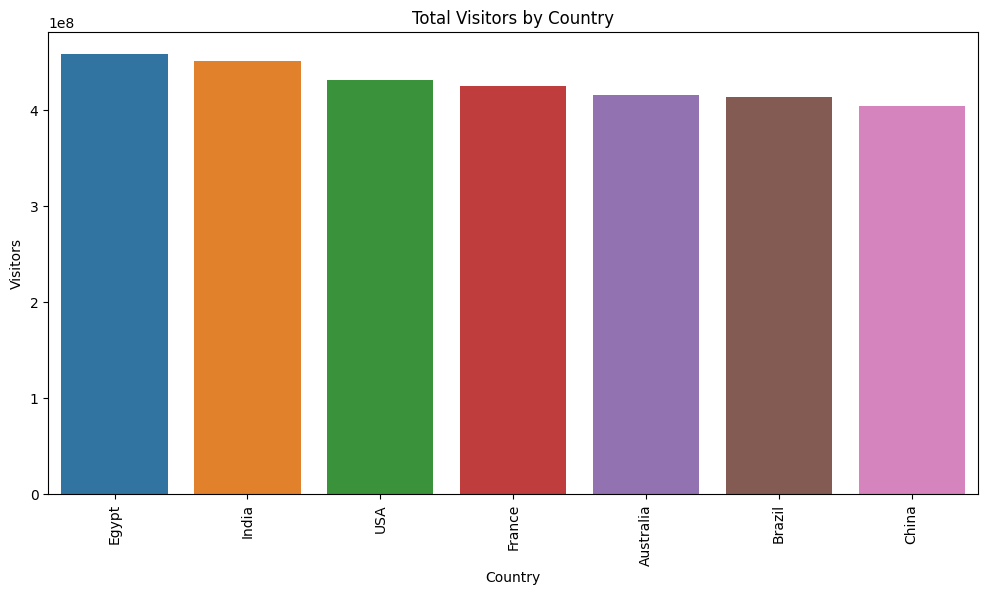

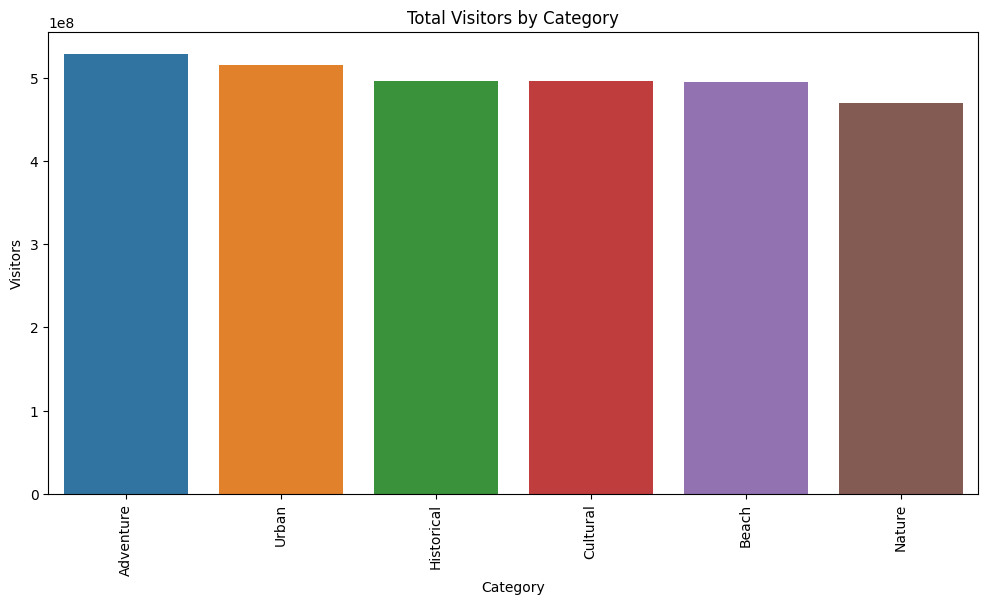

In [4]:
# Visitors by Country
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='Visitors', estimator=sum, ci=None, order=df.groupby('Country')['Visitors'].sum().sort_values(ascending=False).index)
plt.title('Total Visitors by Country')
plt.xticks(rotation=90)
plt.show()

# Visitors by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Visitors', estimator=sum, ci=None, order=df.groupby('Category')['Visitors'].sum().sort_values(ascending=False).index)
plt.title('Total Visitors by Category')
plt.xticks(rotation=90)
plt.show()


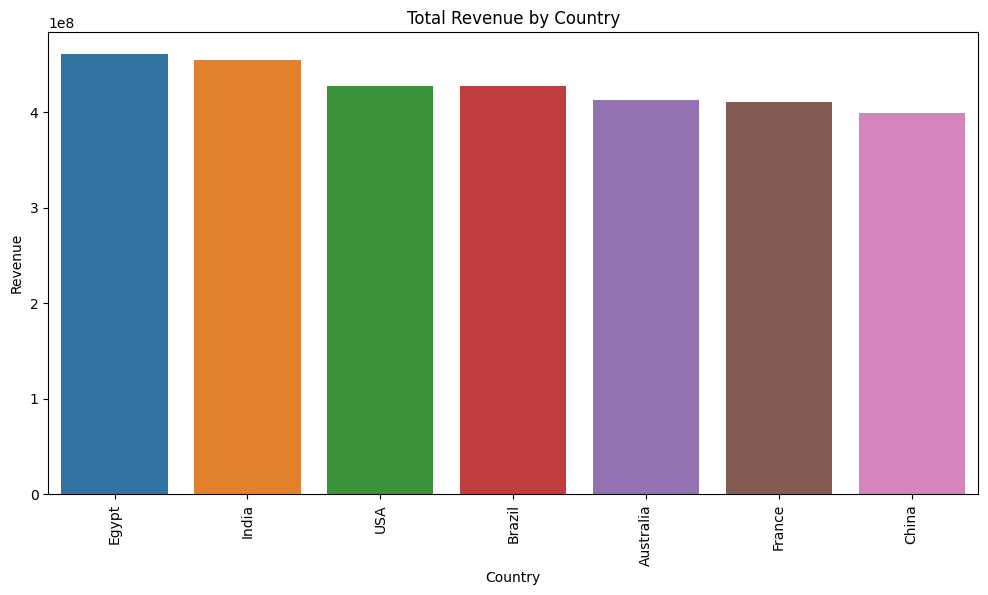

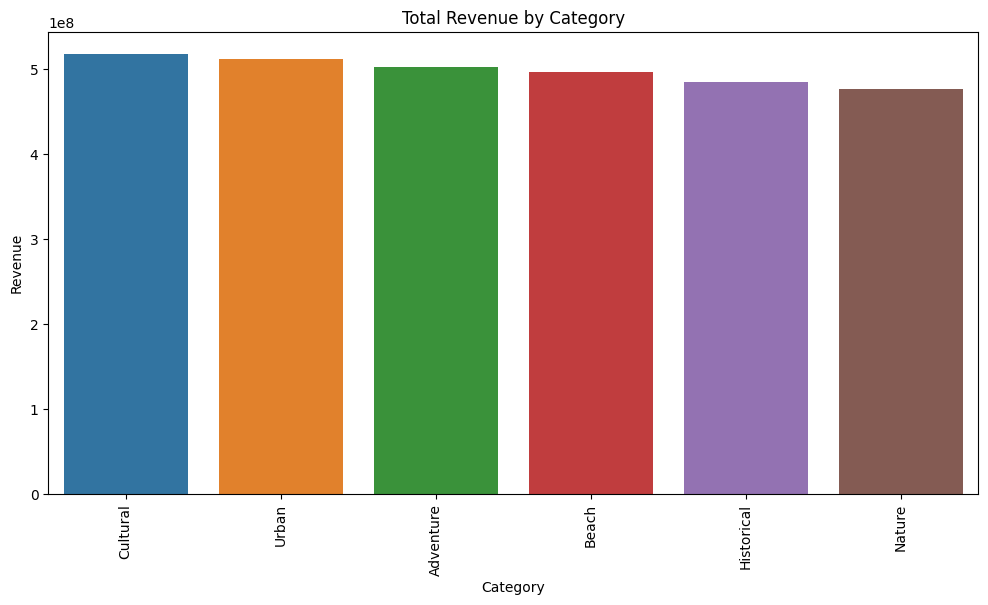

In [5]:
# Revenue by Country
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='Revenue', estimator=sum, ci=None, order=df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).index)
plt.title('Total Revenue by Country')
plt.xticks(rotation=90)
plt.show()

# Revenue by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Revenue', estimator=sum, ci=None, order=df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).index)
plt.title('Total Revenue by Category')
plt.xticks(rotation=90)
plt.show()


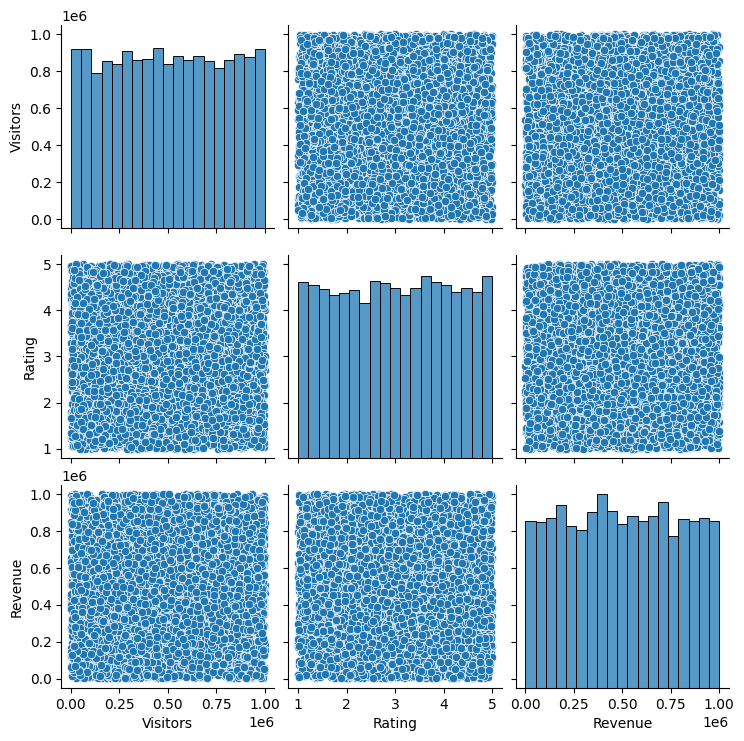

In [6]:
# Pairplot
sns.pairplot(df[numerical_cols])
plt.show()

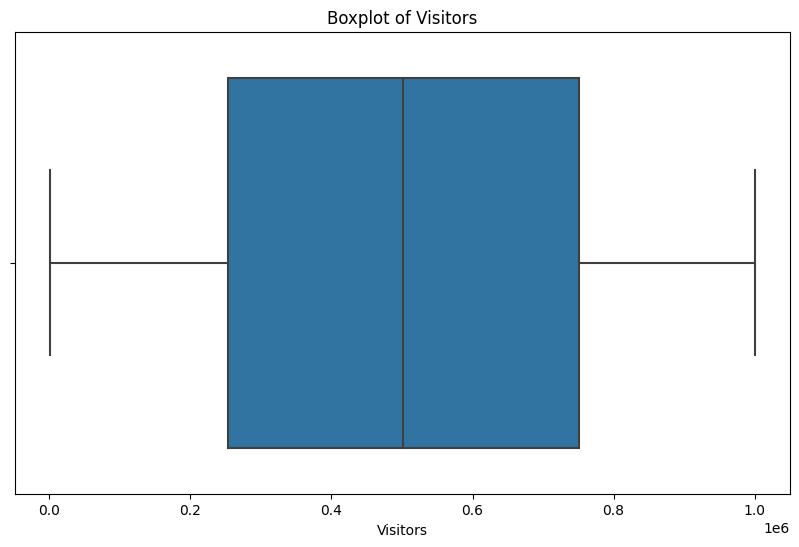

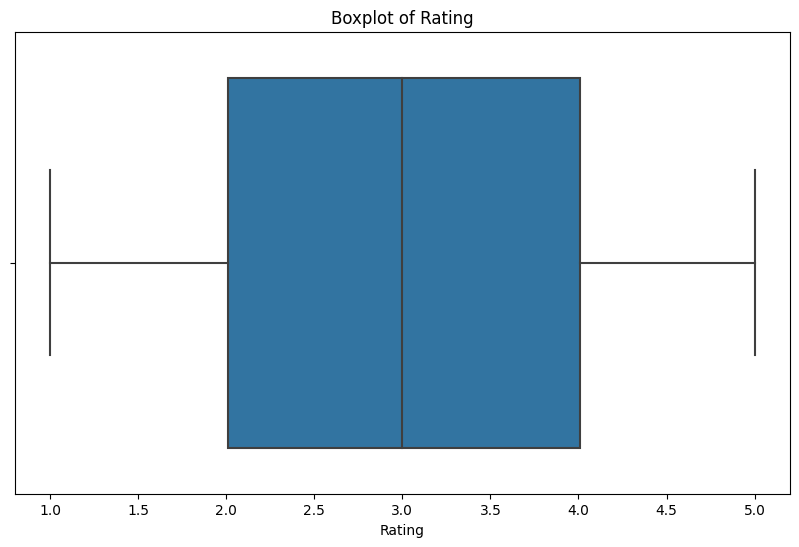

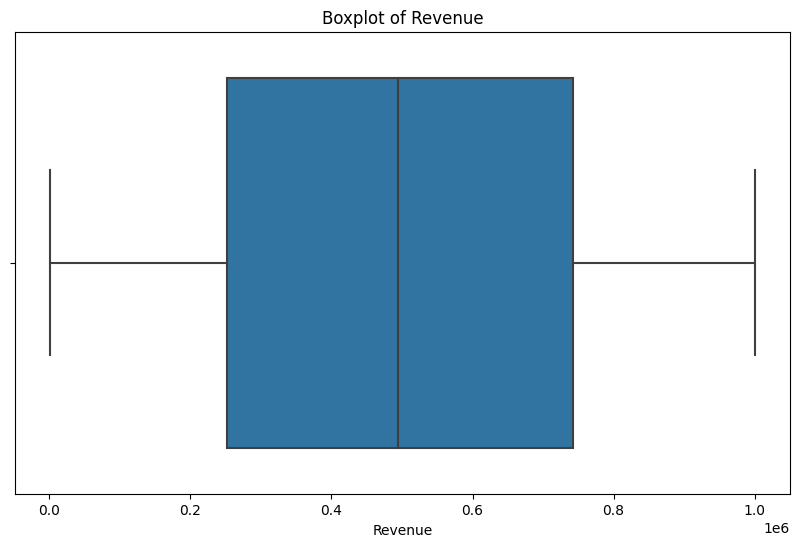

In [7]:
# Boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# **preprocessing**

In [8]:

# Prepare data for modeling
X = df[['Country', 'Category', 'Visitors', 'Rating', 'Revenue', 'Accommodation_Available']]
X = pd.get_dummies(X, drop_first=True) 

# Normalize numerical features
numerical_features = ['Visitors', 'Revenue', 'Rating']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(X)


# **Model**

In [9]:

# Prepare data for modeling
y = df['Visitors']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestRegressor()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END 

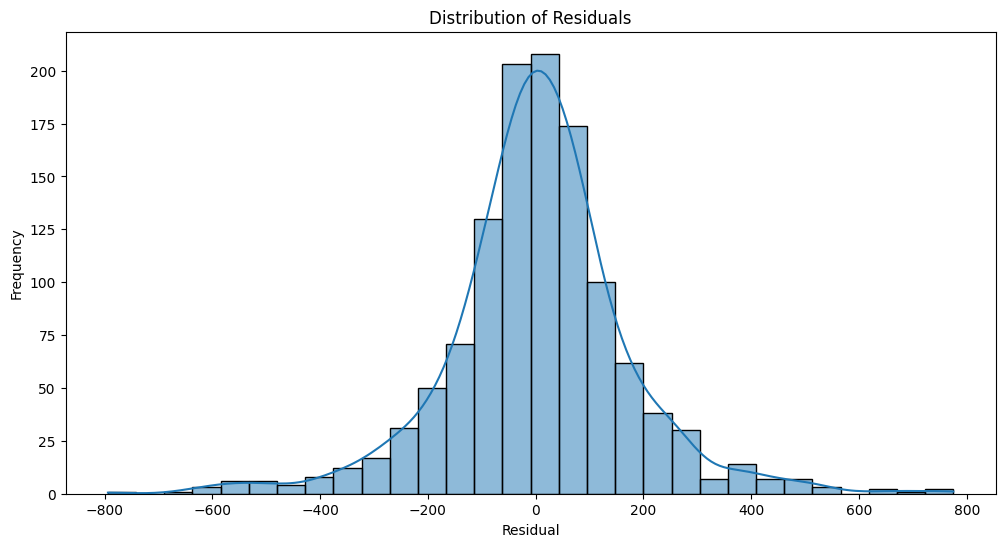

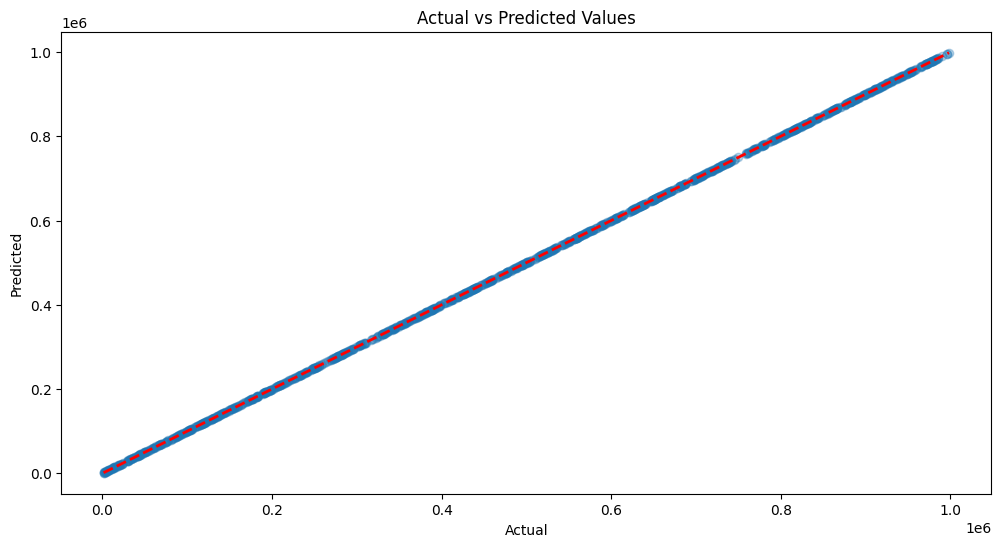

In [10]:
 # Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [11]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared score: {cv_scores.mean()}")
print(f"Standard deviation of R-squared scores: {cv_scores.std()}")


Cross-validation R-squared scores: [0.9999997  0.99999975 0.99999969 0.99999968 0.99999973]
Mean R-squared score: 0.9999997078082477
Standard deviation of R-squared scores: 2.6006311275304903e-08
